In [100]:
import pandas as pd
df = pd.read_csv("cars_ds_final.csv")
df.head()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
df.columns

Index(['Unnamed: 0', 'Make', 'Model', 'Variant', 'Ex-Showroom_Price',
       'Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=141)

In [102]:
#Milage and company+model both independent variable on x axis and dependent - price

In [103]:
df1 = df.filter(['Make', 'Model', 'Displacement', 'Ex-Showroom_Price', 'City_Mileage'])
df1.head()

,Make,Model,Displacement,Ex-Showroom_Price,City_Mileage
0,Tata,Nano Genx,624 cc,"Rs. 2,92,667",?23.6 km/litre
1,Tata,Nano Genx,624 cc,"Rs. 2,36,447",?23.6 km/litre
2,Tata,Nano Genx,624 cc,"Rs. 2,96,661",NaN
3,Tata,Nano Genx,624 cc,"Rs. 3,34,768",?23.6 km/litre
4,Tata,Nano Genx,624 cc,"Rs. 2,72,223",?23.6 km/litre


In [104]:
df1.shape

(1276, 5)

In [105]:
df1 = df1.dropna()
df1.shape

(669, 5)

In [106]:
df1.Model.dtype

dtype('O')

In [107]:
df1['Car'] = df1['Make'] + df1['Model']
df1.head()

,Make,Model,Displacement,Ex-Showroom_Price,City_Mileage,Car
0,Tata,Nano Genx,624 cc,"Rs. 2,92,667",?23.6 km/litre,TataNano Genx
1,Tata,Nano Genx,624 cc,"Rs. 2,36,447",?23.6 km/litre,TataNano Genx
3,Tata,Nano Genx,624 cc,"Rs. 3,34,768",?23.6 km/litre,TataNano Genx
4,Tata,Nano Genx,624 cc,"Rs. 2,72,223",?23.6 km/litre,TataNano Genx
5,Tata,Nano Genx,624 cc,"Rs. 3,14,815",?23.6 km/litre,TataNano Genx


In [108]:
df1 = df1.drop(['Make', 'Model', 'Car'], axis=1)
df1.head()

,Displacement,Ex-Showroom_Price,City_Mileage
0,624 cc,"Rs. 2,92,667",?23.6 km/litre
1,624 cc,"Rs. 2,36,447",?23.6 km/litre
3,624 cc,"Rs. 3,34,768",?23.6 km/litre
4,624 cc,"Rs. 2,72,223",?23.6 km/litre
5,624 cc,"Rs. 3,14,815",?23.6 km/litre


In [109]:
df2 = df1.copy()
df2['Ex-Showroom_Price'] = df2['Ex-Showroom_Price'].map(lambda x: str(x)[3:])
df2.head()

,Displacement,Ex-Showroom_Price,City_Mileage
0,624 cc,"2,92,667",?23.6 km/litre
1,624 cc,"2,36,447",?23.6 km/litre
3,624 cc,"3,34,768",?23.6 km/litre
4,624 cc,"2,72,223",?23.6 km/litre
5,624 cc,"3,14,815",?23.6 km/litre


In [110]:
df2['Ex-Showroom_Price'] = df2['Ex-Showroom_Price'].str.replace(',', '')
df2.head()

,Displacement,Ex-Showroom_Price,City_Mileage
0,624 cc,292667,?23.6 km/litre
1,624 cc,236447,?23.6 km/litre
3,624 cc,334768,?23.6 km/litre
4,624 cc,272223,?23.6 km/litre
5,624 cc,314815,?23.6 km/litre


In [111]:
df2.dtypes

Displacement         object
Ex-Showroom_Price    object
City_Mileage         object
dtype: object

In [112]:
df2['City_Mileage'] = df2['City_Mileage'].str.replace(r'?', '')
df2['City_Mileage'] = df2['City_Mileage'].map(lambda x: str(x)[:-9])
df2.head()

C:\Users\PARAMJIT SINGH AWAL\AppData\Local\Temp\ipykernel_20736\763618859.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['City_Mileage'] = df2['City_Mileage'].str.replace(r'?', '')


,Displacement,Ex-Showroom_Price,City_Mileage
0,624 cc,292667,23.6
1,624 cc,236447,23.6
3,624 cc,334768,23.6
4,624 cc,272223,23.6
5,624 cc,314815,23.6


In [113]:
df2['Displacement'] = df2['Displacement'].str.replace('cc', '')

In [114]:
df2.head()

,Displacement,Ex-Showroom_Price,City_Mileage
0,624,292667,23.6
1,624,236447,23.6
3,624,334768,23.6
4,624,272223,23.6
5,624,314815,23.6


In [115]:
df2.astype({'Ex-Showroom_Price': int, 'Displacement': int, 'City_Mileage': float})
df2.dtypes

ValueError: could not convert string to float: '22,95'

In [117]:
df2 = df2.astype({'Ex-Showroom_Price': int, 'Displacement': int})
df2.dtypes

Displacement          int32
Ex-Showroom_Price     int32
City_Mileage         object
dtype: object

In [118]:
df2['City_Mileage'] = pd.to_numeric(df2['City_Mileage'], errors = 'coerce') #If ‘coerce’, then invalid parsing will be set as NaN.
df2.dtypes

Displacement           int32
Ex-Showroom_Price      int32
City_Mileage         float64
dtype: object

In [121]:
df2 = df2.dropna()
df2.shape

(635, 3)

In [122]:
df2.head()

,Displacement,Ex-Showroom_Price,City_Mileage
0,624,292667,23.6
1,624,236447,23.6
3,624,334768,23.6
4,624,272223,23.6
5,624,314815,23.6


In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
#City_Mileage VS Ex-Showroom_Price(y,dependent)

TypeError: 'value' must be an instance of str or bytes, not a float

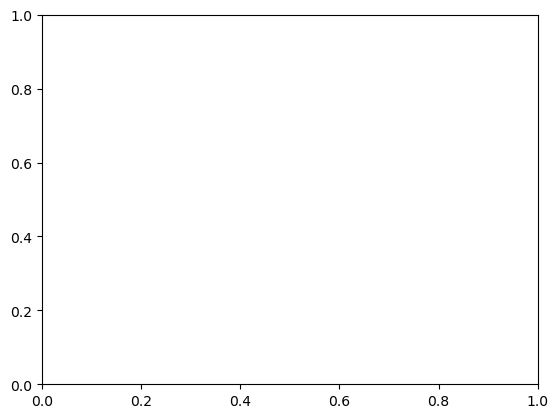

In [125]:
plt.scatter(df['City_Mileage'], df['Ex-Showroom_Price'])